<a href="https://colab.research.google.com/github/lapprenti500/el_nino_dataset/blob/main/nino_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data_Elnino.csv', delim_whitespace=True, header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6101.0,-9999.00,-9999.00,-9999.00,-9999.00,-5.37,-1.09,2.64,9.62,-2.46,-2.44,0.98,-3.69
1,6102.0,-9999.00,-9999.00,-9999.00,-9999.00,-6.58,-1.63,3.84,-16.44,-8.30,-6.53,4.12,1.21
2,6103.0,-9999.00,-9999.00,-9999.00,-9999.00,16.25,14.76,16.26,21.68,-13.31,-11.81,-9.29,-5.09
3,6104.0,-9999.00,-9999.00,-9999.00,-9999.00,-17.27,-3.42,-5.58,2.53,7.49,-0.06,3.41,-7.80
4,6105.0,-9999.00,-9999.00,-9999.00,-9999.00,19.96,20.11,13.97,21.94,-11.85,-4.17,-7.58,-4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,9612.0,-1.21,-0.63,-0.48,0.31,-0.54,-1.48,-13.85,-17.54,23.82,22.30,5.67,-4.70
432,9701.0,-0.74,-0.41,-0.47,0.44,-9.33,-9.81,-16.06,-15.57,1.10,-1.62,1.31,-10.73
433,9702.0,0.06,-0.02,-0.37,0.56,10.87,-1.54,-17.57,-34.58,12.95,16.33,5.83,4.85
434,9703.0,0.86,0.29,-0.27,0.65,-3.25,-1.56,4.79,14.13,3.80,3.08,0.21,-8.11


In [4]:
data.columns = ['date',	'SST1',	'SST2',	'SST3',	'SST4',	'Tx1',	'Tx2',	'Tx3',	'Tx4',	'Ty1',	'Ty2',	'Ty3',	'Ty4']

In [5]:
data

,date,SST1,SST2,SST3,SST4,Tx1,Tx2,Tx3,Tx4,Ty1,Ty2,Ty3,Ty4
0,6101.0,-9999.00,-9999.00,-9999.00,-9999.00,-5.37,-1.09,2.64,9.62,-2.46,-2.44,0.98,-3.69
1,6102.0,-9999.00,-9999.00,-9999.00,-9999.00,-6.58,-1.63,3.84,-16.44,-8.30,-6.53,4.12,1.21
2,6103.0,-9999.00,-9999.00,-9999.00,-9999.00,16.25,14.76,16.26,21.68,-13.31,-11.81,-9.29,-5.09
3,6104.0,-9999.00,-9999.00,-9999.00,-9999.00,-17.27,-3.42,-5.58,2.53,7.49,-0.06,3.41,-7.80
4,6105.0,-9999.00,-9999.00,-9999.00,-9999.00,19.96,20.11,13.97,21.94,-11.85,-4.17,-7.58,-4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,9612.0,-1.21,-0.63,-0.48,0.31,-0.54,-1.48,-13.85,-17.54,23.82,22.30,5.67,-4.70
432,9701.0,-0.74,-0.41,-0.47,0.44,-9.33,-9.81,-16.06,-15.57,1.10,-1.62,1.31,-10.73
433,9702.0,0.06,-0.02,-0.37,0.56,10.87,-1.54,-17.57,-34.58,12.95,16.33,5.83,4.85
434,9703.0,0.86,0.29,-0.27,0.65,-3.25,-1.56,4.79,14.13,3.80,3.08,0.21,-8.11


In [6]:
# conversion de la date
def custom_date_parser(date_str):
    date_str = date_str.replace('.0', '')  # on elimine 0.1
    year = "19" + date_str[:2]  # on extrait l'année on ajoute le 19
    month = date_str[2:]       # on extrait le mois
    return pd.to_datetime(year + month, format='%Y%m')

# Apply the custom parser to the 'date' column
data['date'] = data['date'].astype(str).apply(custom_date_parser)

In [7]:
data


,date,SST1,SST2,SST3,SST4,Tx1,Tx2,Tx3,Tx4,Ty1,Ty2,Ty3,Ty4
0,1961-01-01,-9999.00,-9999.00,-9999.00,-9999.00,-5.37,-1.09,2.64,9.62,-2.46,-2.44,0.98,-3.69
1,1961-02-01,-9999.00,-9999.00,-9999.00,-9999.00,-6.58,-1.63,3.84,-16.44,-8.30,-6.53,4.12,1.21
2,1961-03-01,-9999.00,-9999.00,-9999.00,-9999.00,16.25,14.76,16.26,21.68,-13.31,-11.81,-9.29,-5.09
3,1961-04-01,-9999.00,-9999.00,-9999.00,-9999.00,-17.27,-3.42,-5.58,2.53,7.49,-0.06,3.41,-7.80
4,1961-05-01,-9999.00,-9999.00,-9999.00,-9999.00,19.96,20.11,13.97,21.94,-11.85,-4.17,-7.58,-4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1996-12-01,-1.21,-0.63,-0.48,0.31,-0.54,-1.48,-13.85,-17.54,23.82,22.30,5.67,-4.70
432,1997-01-01,-0.74,-0.41,-0.47,0.44,-9.33,-9.81,-16.06,-15.57,1.10,-1.62,1.31,-10.73
433,1997-02-01,0.06,-0.02,-0.37,0.56,10.87,-1.54,-17.57,-34.58,12.95,16.33,5.83,4.85
434,1997-03-01,0.86,0.29,-0.27,0.65,-3.25,-1.56,4.79,14.13,3.80,3.08,0.21,-8.11


In [8]:
# Filtrage des données invalides
data = data[data['SST1'] != -9999.00]

In [9]:
data

,date,SST1,SST2,SST3,SST4,Tx1,Tx2,Tx3,Tx4,Ty1,Ty2,Ty3,Ty4
108,1970-01-01,0.47,0.06,0.02,0.24,-5.40,-4.12,3.05,1.86,7.24,7.55,-1.34,-0.64
109,1970-02-01,-0.17,-0.29,-0.03,0.32,10.00,3.67,9.65,17.36,-18.14,-10.41,-4.91,-7.58
110,1970-03-01,-0.56,-0.55,-0.13,0.22,-2.33,0.80,-0.62,2.72,-0.78,5.18,0.77,2.13
111,1970-04-01,-0.70,-0.68,-0.25,0.16,2.23,6.38,4.69,3.00,-4.47,-6.71,-0.86,-3.55
112,1970-05-01,-0.81,-0.80,-0.43,0.11,16.20,16.07,3.84,15.61,-11.14,-9.58,-8.46,-3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1996-12-01,-1.21,-0.63,-0.48,0.31,-0.54,-1.48,-13.85,-17.54,23.82,22.30,5.67,-4.70
432,1997-01-01,-0.74,-0.41,-0.47,0.44,-9.33,-9.81,-16.06,-15.57,1.10,-1.62,1.31,-10.73
433,1997-02-01,0.06,-0.02,-0.37,0.56,10.87,-1.54,-17.57,-34.58,12.95,16.33,5.83,4.85
434,1997-03-01,0.86,0.29,-0.27,0.65,-3.25,-1.56,4.79,14.13,3.80,3.08,0.21,-8.11


In [10]:
data.set_index('date', inplace=True)

In [11]:
data

,SST1,SST2,SST3,SST4,Tx1,Tx2,Tx3,Tx4,Ty1,Ty2,Ty3,Ty4
date,,,,,,,,,,,,
1970-01-01,0.47,0.06,0.02,0.24,-5.40,-4.12,3.05,1.86,7.24,7.55,-1.34,-0.64
1970-02-01,-0.17,-0.29,-0.03,0.32,10.00,3.67,9.65,17.36,-18.14,-10.41,-4.91,-7.58
1970-03-01,-0.56,-0.55,-0.13,0.22,-2.33,0.80,-0.62,2.72,-0.78,5.18,0.77,2.13
1970-04-01,-0.70,-0.68,-0.25,0.16,2.23,6.38,4.69,3.00,-4.47,-6.71,-0.86,-3.55
1970-05-01,-0.81,-0.80,-0.43,0.11,16.20,16.07,3.84,15.61,-11.14,-9.58,-8.46,-3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-01,-1.21,-0.63,-0.48,0.31,-0.54,-1.48,-13.85,-17.54,23.82,22.30,5.67,-4.70
1997-01-01,-0.74,-0.41,-0.47,0.44,-9.33,-9.81,-16.06,-15.57,1.10,-1.62,1.31,-10.73
1997-02-01,0.06,-0.02,-0.37,0.56,10.87,-1.54,-17.57,-34.58,12.95,16.33,5.83,4.85


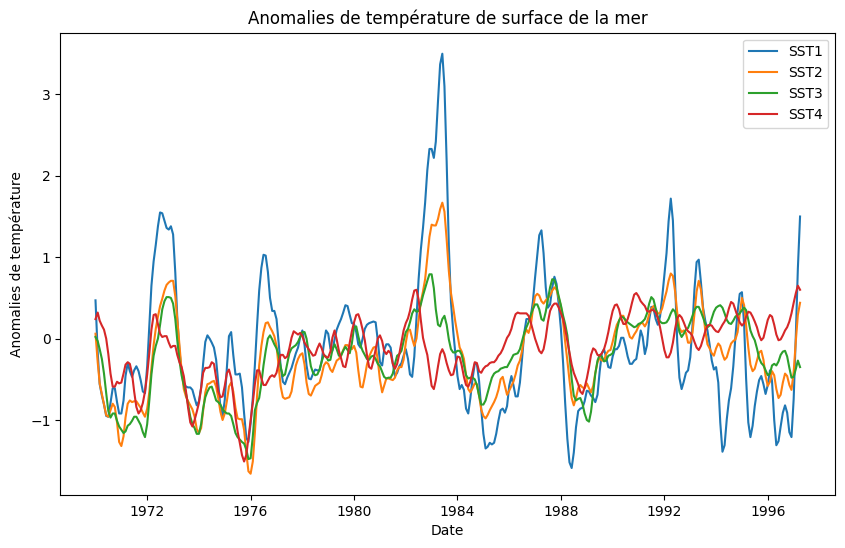

In [12]:
# Graphique des données
plt.figure(figsize=(10, 6))
for col in ['SST1', 'SST2', 'SST3', 'SST4']:
    plt.plot(data.index, data[col], label=col)
plt.xlabel('Date')
plt.ylabel('Anomalies de température')
plt.title('Anomalies de température de surface de la mer')
plt.legend()
plt.show()

In [13]:
stats = data[['SST1', 'SST2', 'SST3', 'SST4']].describe()
print(stats)

             SST1        SST2        SST3        SST4
count  328.000000  328.000000  328.000000  328.000000
mean    -0.096433   -0.214329   -0.208140   -0.116677
std      0.823828    0.568441    0.490386    0.387006
min     -1.590000   -1.660000   -1.480000   -1.510000
25%     -0.610000   -0.612500   -0.480000   -0.350000
50%     -0.270000   -0.270000   -0.180000   -0.105000
75%      0.232500    0.132500    0.192500    0.182500
max      3.500000    1.670000    0.790000    0.650000


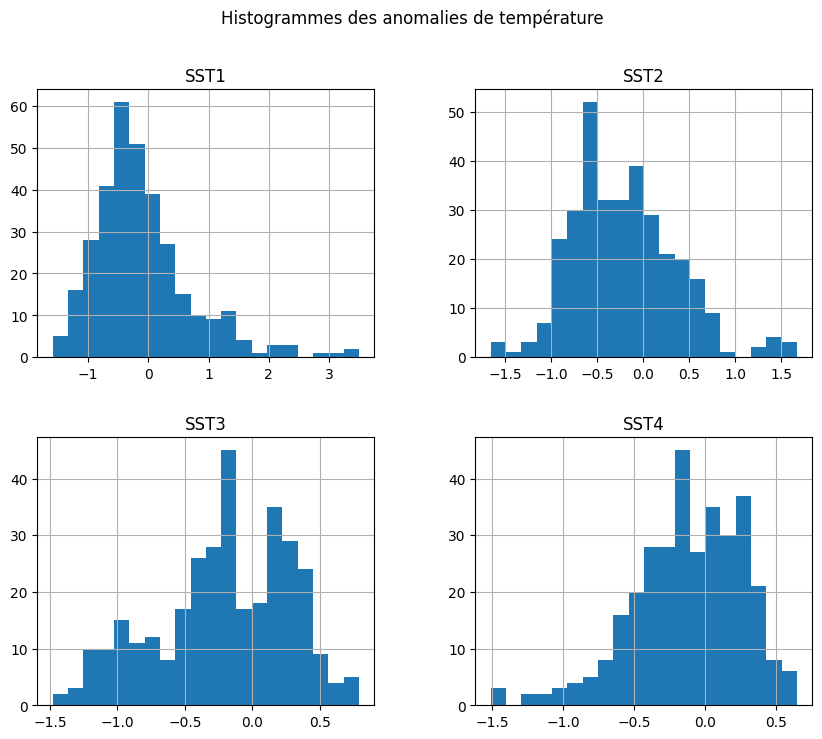

In [14]:
# Histogrammes
data[['SST1', 'SST2', 'SST3', 'SST4']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogrammes des anomalies de température')
plt.show()



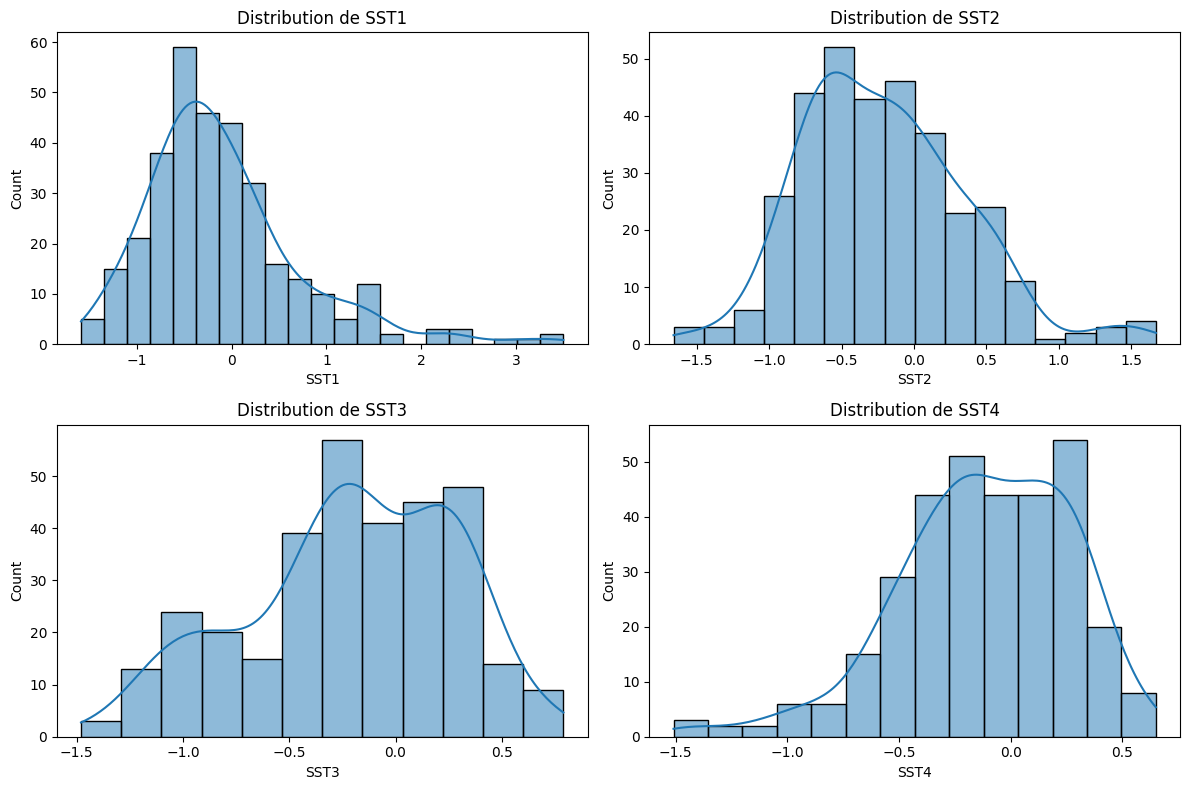

In [15]:
# 2. Histogrammes
plt.figure(figsize=(12, 8))
for i, col in enumerate(['SST1', 'SST2', 'SST3', 'SST4'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

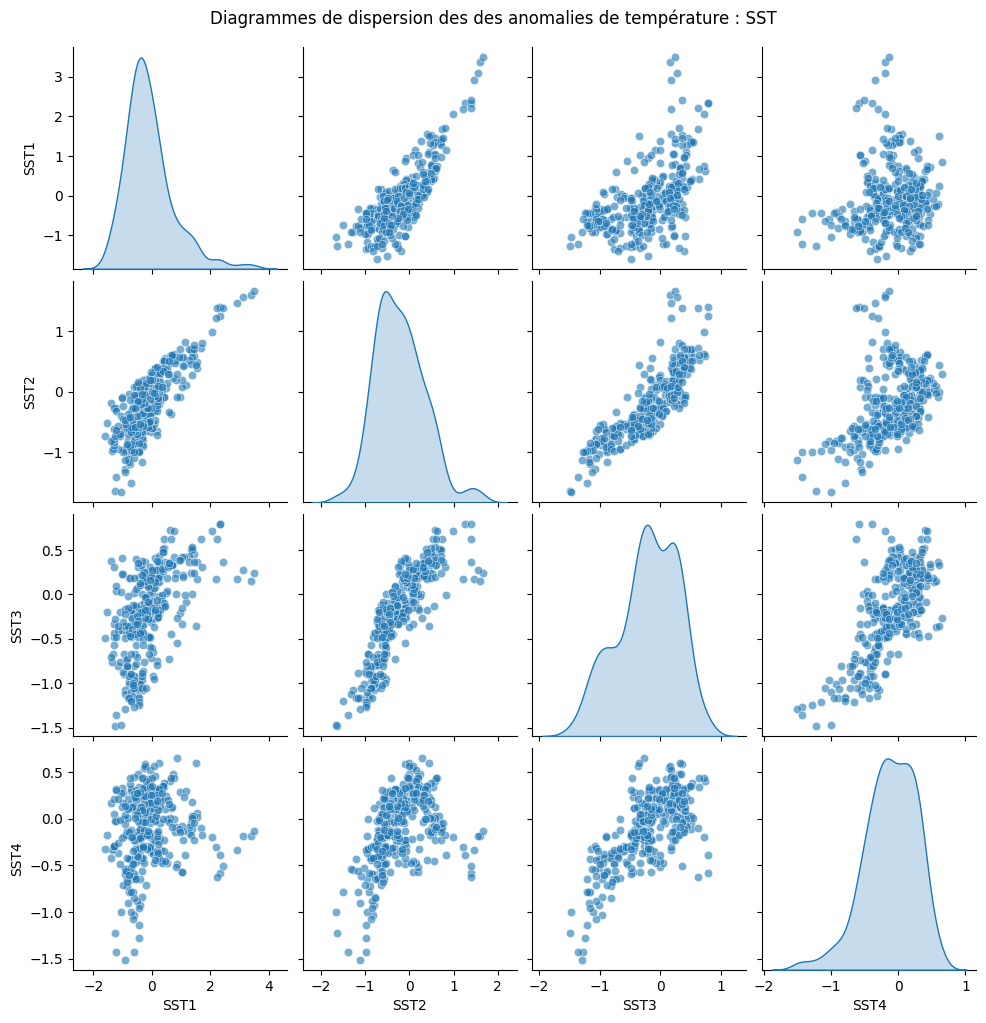

Matrice de corrélation:
          SST1      SST2      SST3      SST4
SST1  1.000000  0.828295  0.541563  0.131028
SST2  0.828295  1.000000  0.846905  0.449862
SST3  0.541563  0.846905  1.000000  0.707127
SST4  0.131028  0.449862  0.707127  1.000000


In [16]:
# 3. Diagrammes de dispersion et corrélations
sns.pairplot(data[['SST1', 'SST2', 'SST3', 'SST4']],
             diag_kind='kde',
             plot_kws={'alpha': 0.6})
plt.suptitle("Diagrammes de dispersion des des anomalies de température : SST", y=1.02)
plt.show()

corr_matrix = data[['SST1', 'SST2', 'SST3', 'SST4']].corr()
print("Matrice de corrélation:")
print(corr_matrix)

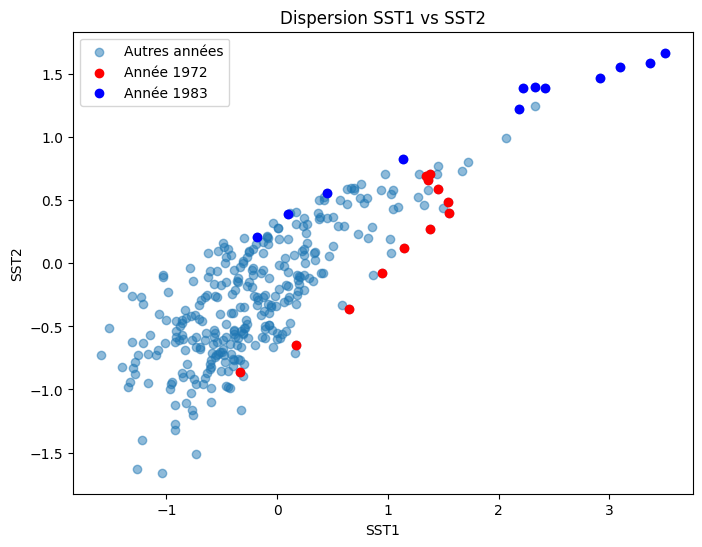

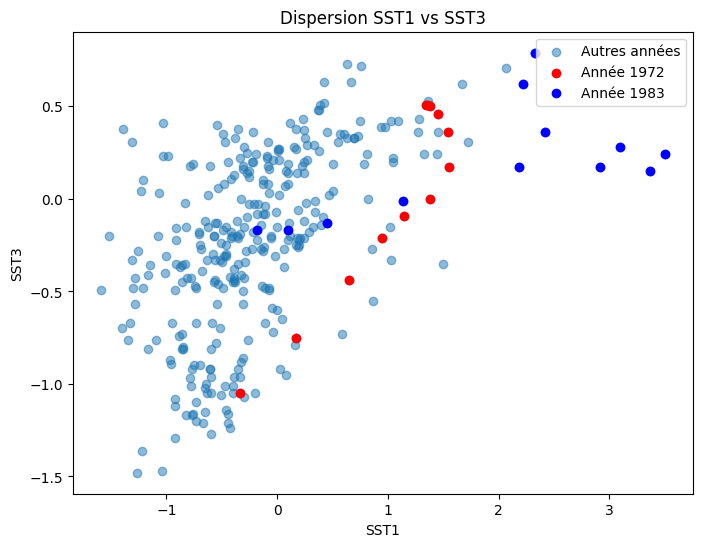

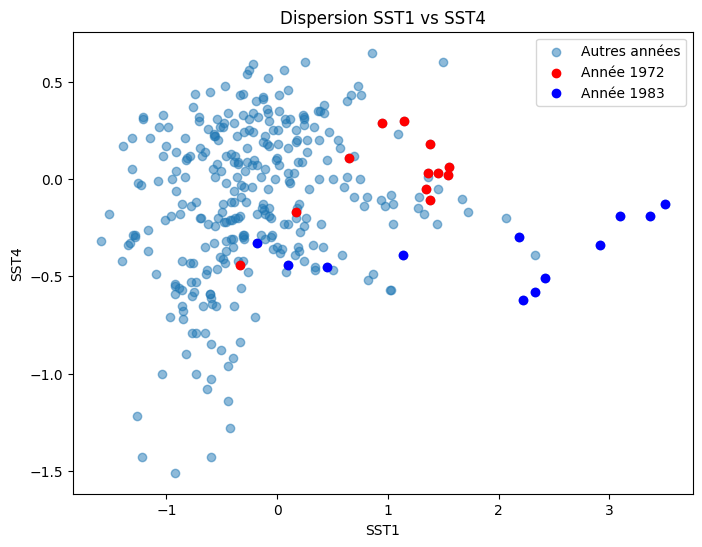

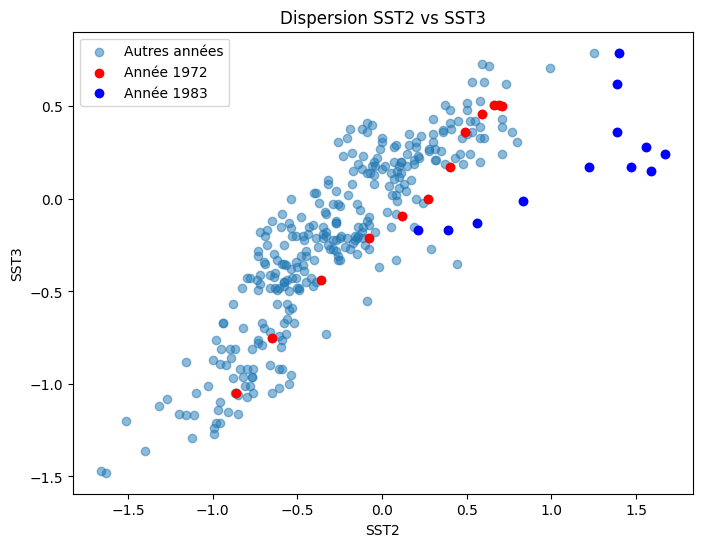

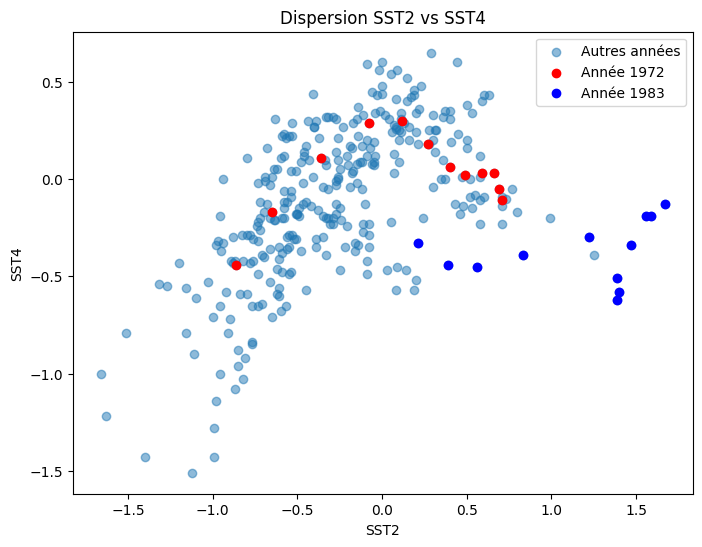

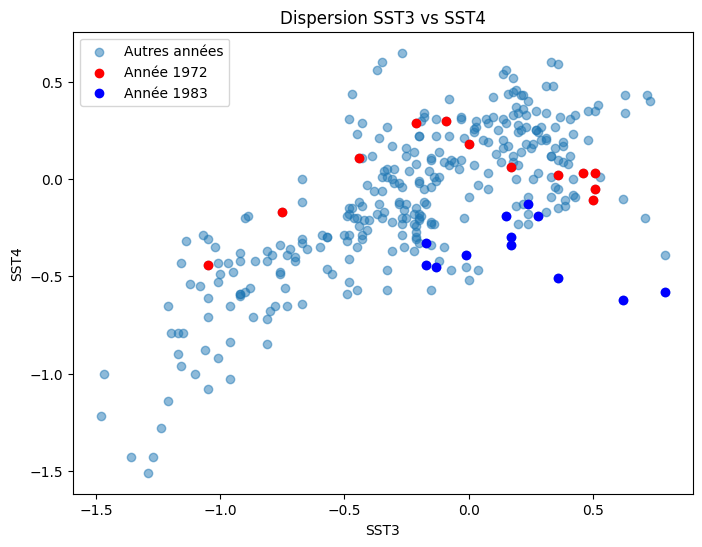

In [24]:
# Mettre en évidence les années 72 et 83
important_years = [1972, 1983]
colors = {1972: 'red', 1983: 'blue'}

for i, col1 in enumerate(['SST1', 'SST2', 'SST3', 'SST4']):
    for j, col2 in enumerate(['SST1', 'SST2', 'SST3', 'SST4']):
        if i < j:
            plt.figure(figsize=(8, 6))
            plt.scatter(data[col1], data[col2], alpha=0.5, label='Autres années')
            for year in important_years:
                year_data = data[data.index.year == year]
                plt.scatter(year_data[col1], year_data[col2],
                            color=colors[year], label=f'Année {year}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Dispersion {col1} vs {col2}')
            plt.legend()
            plt.show()